In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy.random as npr

import sys
import os
core_dir = os.path.join(os.getcwd(), '../..', 'nomad')
core_dir = os.path.normpath(core_dir)
sys.path.append(core_dir)

import city_gen as cg
from city_gen import City, Building, Street
import traj_gen as tg
from traj_gen import Agent, Population
import stop_detection as sd
from constants import DEFAULT_SPEEDS, FAST_SPEEDS, SLOW_SPEEDS, DEFAULT_STILL_PROBS
from constants import FAST_STILL_PROBS, SLOW_STILL_PROBS, ALLOWED_BUILDINGS

import pdb

# Initialization of city and population

To create a city, begin by initializing a City of the desired dimension. Then successively add Buildings to the city by defining their type, door location, and geometry (either as a bounding box or a list of block coordinates). The final step is to call city.get_street_graph(), which generates the shortest paths between all blocks.

In [2]:
from shapely.geometry import box

# Initialize city
city = City(dimensions=(22, 22))

# add park
city.add_building('park', (13, 11), bbox=box(9, 9, 13, 13))

# add homes
city.add_building('home', (8, 8), [(7, 7), (7, 8)])
city.add_building('home', (9, 8), [(8, 7), (9, 7)])
city.add_building('home', (10, 8), [(10, 7)])
city.add_building('home', (11, 8), [(11, 7)])
city.add_building('home', (13, 6), [(13, 7)])
city.add_building('home', (14, 6), [(14, 7)])
city.add_building('home', (13, 8), [(14, 8)])
city.add_building('home', (13, 9), [(14, 9)])
city.add_building('home', (13, 11), [(14, 11)])
city.add_building('home', (13, 12), [(14, 12)])
city.add_building('home', (15, 13), [(14, 13)])
city.add_building('home', (13, 13), [(13, 14), (14, 14)])
city.add_building('home', (12, 13), [(12, 14)])
city.add_building('home', (11, 13), [(11, 14)])
city.add_building('home', (9, 13), [(9, 14)])
city.add_building('home', (8, 13), [(8, 14)])
city.add_building('home', (7, 15), [(7, 14)])
city.add_building('home', (6, 13), [(7, 13)])
city.add_building('home', (8, 12), [(7, 12)])
city.add_building('home', (8, 10), [(7, 10), (7, 9)])

# add workplaces
city.add_building('work', (3, 4), [(4, 4), (4, 5)])
city.add_building('work', (5, 3), [(5, 4), (5, 5)])
city.add_building('work', (6, 6), bbox=box(6, 4, 8, 6))
city.add_building('work', (8, 6), bbox=box(8, 4, 10, 6))
city.add_building('work', (12, 6), bbox=box(11, 5, 14, 6))
city.add_building('work', (12, 3), bbox=box(11, 4, 14, 5))
city.add_building('work', (15, 3), bbox=box(14, 4, 17, 6))
city.add_building('work', (18, 4), bbox=box(17, 4, 18, 6))
city.add_building('work', (18, 6), bbox=box(16, 6, 18, 8))
city.add_building('work', (15, 9), bbox=box(16, 8, 17, 10))
city.add_building('work', (18, 8), bbox=box(17, 8, 18, 10))
city.add_building('work', (18, 10), bbox=box(16, 10, 18, 12))
city.add_building('work', (18, 13), bbox=box(16, 13, 18, 15))
city.add_building('work', (18, 15), bbox=box(16, 15, 18, 16))
city.add_building('work', (15, 15), bbox=box(15, 16, 18, 17))
city.add_building('work', (14, 15), [(14, 16)])
city.add_building('work', (16, 18), bbox=box(16, 17, 18, 18))
city.add_building('work', (15, 18), bbox=box(14, 17, 16, 18))
city.add_building('work', (13, 18), bbox=box(12, 16, 14, 18))
city.add_building('work', (11, 18), bbox=box(10, 17, 12, 18))
city.add_building('work', (11, 15), bbox=box(10, 16, 12, 17))
city.add_building('work', (8, 18), bbox=box(7, 16, 9, 18))
city.add_building('work', (6, 18), bbox=box(5, 17, 7, 18))
city.add_building('work', (6, 15), bbox=box(5, 16, 7, 17))
city.add_building('work', (3, 16), [(4, 16), (4, 17)])
city.add_building('work', (3, 13), bbox=box(4, 13, 6, 16))
city.add_building('work', (6, 12), bbox=box(4, 12, 6, 13))
city.add_building('work', (3, 10), [(4, 9), (4, 10)])
city.add_building('work', (6, 9), [(5, 9), (5, 10)])
city.add_building('work', (6, 8), [(4, 8), (5, 8)])
city.add_building('work', (3, 6), bbox=box(4, 6, 6, 8))

# add retail
city.add_building('retail', (0, 1), bbox=box(1, 1, 3, 3))
city.add_building('retail', (3, 0), bbox=box(3, 1, 5, 3))
city.add_building('retail', (5, 0), [(5, 1)])
city.add_building('retail', (5, 3), [(5, 2)])
city.add_building('retail', (6, 0), bbox=box(6, 1, 8, 2))
city.add_building('retail', (6, 3), bbox=box(6, 2, 8, 3))
city.add_building('retail', (9, 3), bbox=box(9, 1, 10, 3))
city.add_building('retail', (12, 3), bbox=box(10, 1, 13, 3))
city.add_building('retail', (14, 3), bbox=box(13, 1, 15, 3))
city.add_building('retail', (15, 3), [(15, 2)])
city.add_building('retail', (16, 3), [(16, 2)])
city.add_building('retail', (15, 0), [(15, 1)])
city.add_building('retail', (16, 0), [(16, 1)])
city.add_building('retail', (17, 3), bbox=box(17, 2, 19, 3))
city.add_building('retail', (18, 0), bbox=box(17, 1, 19, 2))
city.add_building('retail', (19, 0), bbox=box(19, 1, 21, 2))
city.add_building('retail', (18, 3), bbox=box(19, 2, 21, 4))
city.add_building('retail', (18, 5), bbox=box(19, 4, 21, 6))
city.add_building('retail', (18, 7), bbox=box(19, 6, 20, 8))
city.add_building('retail', (21, 7), bbox=box(20, 6, 21, 8))
city.add_building('retail', (18, 10), bbox=box(19, 9, 21, 11))
city.add_building('retail', (18, 11), bbox=box(19, 11, 21, 13))
city.add_building('retail', (18, 13), bbox=box(19, 13, 20, 15))
city.add_building('retail', (21, 13), bbox=box(20, 13, 21, 15))
city.add_building('retail', (21, 16), bbox=box(19, 15, 21, 17))
city.add_building('retail', (21, 18), bbox=box(19, 17, 21, 19))

city.add_building('retail', (21, 19), bbox=box(19, 19, 21, 20))
city.add_building('retail', (20, 21), bbox=box(19, 20, 21, 21))
city.add_building('retail', (17, 18), bbox=box(17, 19, 18, 21))
city.add_building('retail', (16, 18), bbox=box(16, 19, 17, 21))
city.add_building('retail', (14, 18), bbox=box(13, 19, 16, 20))
city.add_building('retail', (15, 21), bbox=box(14, 20, 16, 21))
city.add_building('retail', (13, 21), bbox=box(12, 20, 14, 21))
city.add_building('retail', (12, 18), bbox=box(12, 19, 13, 20))
city.add_building('retail', (11, 18), bbox=box(10, 19, 12, 21))
city.add_building('retail', (9, 18), bbox=box(8, 19, 10, 20))
city.add_building('retail', (9, 21), bbox=box(8, 20, 10, 21))
city.add_building('retail', (6, 21), bbox=box(5, 19, 7, 21))
city.add_building('retail', (4, 21), bbox=box(3, 20, 5, 21))
city.add_building('retail', (4, 18), bbox=box(3, 19, 5, 20))
city.add_building('retail', (2, 18), bbox=box(2, 19, 3, 21))
city.add_building('retail', (1, 18), bbox=box(1, 19, 2, 21))
city.add_building('retail', (3, 17), bbox=box(1, 16, 3, 18))
city.add_building('retail', (3, 15), bbox=box(1, 15, 3, 16))
city.add_building('retail', (3, 14), bbox=box(1, 14, 3, 15))
city.add_building('retail', (3, 12), bbox=box(1, 12, 3, 14))
city.add_building('retail', (3, 11), bbox=box(1, 11, 3, 12))
city.add_building('retail', (3, 10), bbox=box(1, 10, 3, 11))
city.add_building('retail', (3, 8), bbox=box(1, 8, 3, 10))
city.add_building('retail', (3, 7), bbox=box(1, 7, 3, 8))
city.add_building('retail', (0, 5), bbox=box(1, 4, 2, 7))
city.add_building('retail', (3, 6), [(2, 6)])
city.add_building('retail', (3, 5), [(2, 5)])
city.add_building('retail', (3, 4), [(2, 4)])

city.get_street_graph()
city.save('garden-city.pkl')

After initialization, you can save the city as a pkl by calling city.save('filename.pkl'). Subsequent uses of the city then only require loading the city via mmod.load('filename.pkl').

In [3]:
city = cg.load('garden-city.pkl')

To view the city, call city.plot_city()

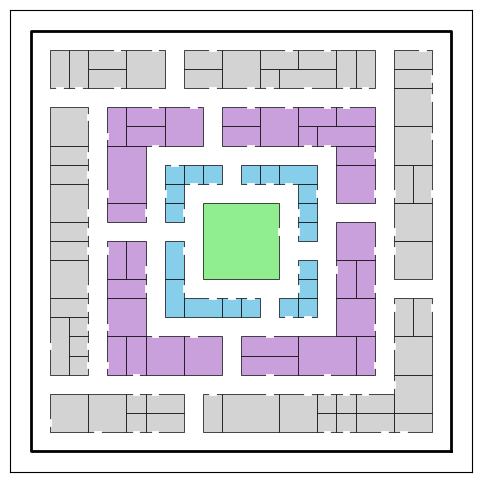

In [4]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
plt.box(on=False)

city.plot_city(ax, doors=True, address=False)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

plt.show()
plt.savefig('gc_empty.png')

Each Building is assigned a unique identifier by its type and door coordinate. For example, the retail building with door coordinate (12, 3) has the id 'r-x12-y3'. Individual Buildings objects and their attributes may be accessed throught the city.buildings dictionary.

In [5]:
print(city.buildings['r-x12-y3'].blocks)
city.buildings['r-x12-y3'].door_centroid

[(10, 1), (10, 2), (11, 1), (11, 2), (12, 1), (12, 2)]


(12.5, 3.0)

Once a City object has been defined, a Population object can be initialized. The Population object will contain the Agents of the city and generate their trajectories.

In [6]:
population = Population(city)

# Trajectory Simulation

Agents can be initialized in several ways:
1. With a user-specified destination diary.
2. With an EPR-generated destination diary.

[1] An Agent can be initialized with a pre-specified destination diary by 
1. Creating a DataFrame with the desired destination diary.
2. Condensing the destination diary using `mmod.condense_destinations`.
3. Initializing the Agent with the condensed destination diary, specifying their home and work buildings.
4. Adding the Agent to the Population.
5. Generating the Agent's trajectory by calling `Population.generate_trajectory`.

Once the agent has been initialized in this way, they will have a diary and a trajectory. Whereas the destination diary specifies the building the user _wants_ to be at any given time interval, the diary specifies the building or street the user _actually_ is at any given time interval, taking into consideration the travel time between buildings (a location of None indicates the Agent is on a street block). The trajectory is a more granular dataframe that contains the exact coordinate ping of the Agent at every timestamp.

In [8]:
# We create an instance of population that we can use to collect all agents
population = Population(city)

In [12]:
# Initialization with custom diary
start_time = [datetime(2000, 1, 1, hour=0, minute=0) + timedelta(minutes=15*t) for t in range(22)]
unix_timestamp = [int(t.timestamp()) for t in start_time]
duration = [15]*22  # in minutes
location = ['h-x8-y13'] * 2 + ['r-x12-y3'] * 4 + ['w-x15-y15'] * 12 + ['h-x8-y13'] * 4

destination = pd.DataFrame({"unix_timestamp":unix_timestamp,
                            "local_timestamp":start_time,
                            "duration":duration,
                            "location":location})

destination = tg.condense_destinations(destination)

Alice = Agent("Alice",
              'h-x8-y13',
              'w-x15-y15',
              city,
              destination_diary=destination)

population.add_agent(Alice)
population.generate_trajectory(Alice, seed=100)

print(Alice.diary.head())

Agent identifier already exists in population. Replacing corresponding agent.
   unix_timestamp     local_timestamp  duration   location
0       946684800 2000-01-01 00:00:00        31   h-x8-y13
1       946686660 2000-01-01 00:31:00         6       None
2       946687020 2000-01-01 00:37:00        54   r-x12-y3
3       946690260 2000-01-01 01:31:00         7       None
4       946690680 2000-01-01 01:38:00       173  w-x15-y15
5       946701060 2000-01-01 04:31:00         4       None
6       946701300 2000-01-01 04:35:00        56   h-x8-y13
            x          y     local_timestamp  unix_timestamp identifier
0    8.500000  14.500000 2000-01-01 00:00:00       946684800      Alice
1    8.500000  14.500000 2000-01-01 00:01:00       946684860      Alice
2    8.500000  14.500000 2000-01-01 00:02:00       946684920      Alice
3    8.500000  14.500000 2000-01-01 00:03:00       946684980      Alice
4    8.500000  14.500000 2000-01-01 00:04:00       946685040      Alice
..        ...     

In [13]:
Alice.__dict__

{'identifier': 'Alice',
 'home': 'h-x8-y13',
 'workplace': 'w-x15-y15',
 'city': <city_gen.City at 0x235f2e0ea40>,
 'destination_diary': Empty DataFrame
 Columns: [unix_timestamp, local_timestamp, duration, location]
 Index: [],
 'diary':    unix_timestamp     local_timestamp  duration   location
 0       946684800 2000-01-01 00:00:00        31   h-x8-y13
 1       946686660 2000-01-01 00:31:00         6       None
 2       946687020 2000-01-01 00:37:00        54   r-x12-y3
 3       946690260 2000-01-01 01:31:00         7       None
 4       946690680 2000-01-01 01:38:00       173  w-x15-y15
 5       946701060 2000-01-01 04:31:00         4       None
 6       946701300 2000-01-01 04:35:00        56   h-x8-y13,
 'still_probs': {'park': 0.5, 'home': 0.9, 'work': 0.9, 'retail': 0.5},
 'speeds': {'park': 1.0204081632653061,
  'home': 0.3826530612244898,
  'work': 0.3826530612244898,
  'retail': 0.8928571428571429},
 'dt': 1,
 'trajectory':             x          y     local_timestamp  unix_

[2] An Agent can be initialized with an EPR-generated destination diary by 
1. Specifying the Agent's home and work Buildings and a starting datetime.
2. Adding the Agent to the Population.
3. Generating the destination diary and trajectory by calling `Population.generate_trajectory`. This method requires an ending datetime `T` to specify the duration of the simulation and a timestep `dt` to define the temporal granularity of the trajectory.

The following agent, Bob, is endowed with home `h-x8-y8` and workplace `w-x18-y4`. We generate a trajectory for Bob that lasts a week from midnight January 1, 2024 to midnight Janurary 8, 2024.

In [8]:
# Initialization and diary generation
Bob = Agent("Bob",
            'h-x8-y8',
            'w-x18-y4',
            city,
            start_time=datetime(2024, 1, 1, hour=0, minute=0))

population.add_agent(Bob)
population.generate_trajectory(Bob, 
                               T=datetime(2024, 1, 8, hour=0, minute=0))

print(Bob.diary.head())

     unix_timestamp     local_timestamp  duration   location
0        1704085200 2024-01-01 00:00:00       481    h-x8-y8
1        1704114060 2024-01-01 13:01:00         4       None
2        1704114300 2024-01-01 13:05:00        56  p-x13-y11
3        1704117660 2024-01-01 14:01:00         3       None
4        1704117840 2024-01-01 14:04:00       177   w-x15-y9
..              ...                 ...       ...        ...
154      1704674040 2024-01-08 00:34:00        12    r-x0-y5
155      1704674760 2024-01-08 00:46:00         4       None
156      1704675000 2024-01-08 00:50:00        11    r-x3-y8
157      1704675660 2024-01-08 01:01:00         5       None
158      1704675960 2024-01-08 01:06:00       235   h-x11-y8

[159 rows x 4 columns]
               x         y     local_timestamp  unix_timestamp identifier
0       7.500000  8.000000 2024-01-01 00:00:00      1704085200        Bob
1       7.500000  8.000000 2024-01-01 05:01:00      1704085260        Bob
2       7.500000  8.00

# custom version to generate the next plot
def sample_hier_nhpp(traj, beta_start, beta_durations, beta_ping, seed=None):
    if seed:
        npr.seed(seed)
    else:
        seed = npr.randint(0, 1000, 1)[0]
        npr.seed(seed)
        print("Seed:", seed)

    # Sample starting points of bursts
    inter_arrival_times = npr.exponential(scale=beta_start, size=len(traj))
    burst_start_points = np.cumsum(inter_arrival_times).astype(int)
    burst_start_points = burst_start_points[burst_start_points < len(traj)]

    # Sample durations of each burst
    burst_durations = np.random.exponential(scale=beta_durations, size=len(burst_start_points)).astype(int)

    # Create start_points and end_points
    burst_end_points = burst_start_points + burst_durations
    burst_end_points = np.minimum(burst_end_points, len(traj) - 1)

    # Adjust end_points to handle overlaps
    for i in range(len(burst_start_points) - 1):
        if burst_end_points[i] > burst_start_points[i + 1]:
            burst_end_points[i] = burst_start_points[i + 1]

    burst_info = pd.DataFrame(columns=['start_time', 'end_time'])

    # Sample pings within each burst
    sampled_trajectories = []
    burst_info = []
    for start, end in zip(burst_start_points, burst_end_points):
        start_time = traj.iloc[start]['local_timestamp']
        end_time = traj.iloc[end]['local_timestamp']
        entry = {'start_time': start_time,
                 'end_time': end_time}
        burst_info.append(entry)

        burst_indices = np.arange(start, end)

        if len(burst_indices) == 0:
            continue

        ping_intervals = np.random.exponential(scale=beta_ping, size=len(burst_indices))
        ping_times = np.unique(np.cumsum(ping_intervals).astype(int))
        ping_times = ping_times[ping_times < (end - start)] + start

        if len(ping_times) == 0:
            continue

        burst_data = traj.iloc[ping_times].copy()
        burst_data['first_ping'] = 0
        if not burst_data.empty:
            burst_data.iloc[0, burst_data.columns.get_loc('first_ping')] = 1

        sampled_trajectories.append(burst_data)

    if sampled_trajectories:
        sampled_traj = pd.concat(sampled_trajectories).sort_values(by='unix_timestamp')
    else:  # empty
        sampled_traj = pd.DataFrame(columns=list(traj.columns))

    burst_info = pd.DataFrame(burst_info)

    sampled_traj = sampled_traj.drop_duplicates('local_timestamp')

    return sampled_traj, burst_info

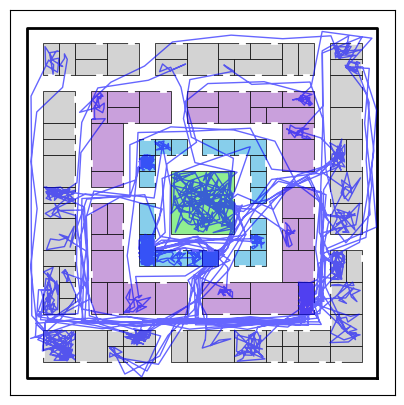

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
city.plot_city(ax, doors=True, address=False, zorder=1)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax.plot(Bob.trajectory.x, Bob.trajectory.y, linewidth=1, color='blue', alpha=0.6)

plt.savefig("garden-city-one-user.png")

The following code produces an animation of Bob's movement. We limit the animation to the 24 hours between midnight January 4 to midnight January 5 for speed and tractability of the output.

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

city.plot_city(ax, doors=True, address=False, zorder=1)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

line, = ax.plot([], [], color='blue', alpha=0.1)
scatter = ax.scatter([], [], s=8, color='black', alpha=0.5)
time_text = ax.text(0.5, 0.975, '', transform=ax.transAxes)

fade_length = 60  # Adjust this to control the length of the fade

df = Bob.trajectory[5760:7200]  # 0:00 Jan 4 – 0:00 Jan 5

def update(i):
    if i < fade_length:
        current_fade_length = i + 1
    else:
        current_fade_length = fade_length
    alphas = np.array([np.exp(-0.5*x) for x in range(current_fade_length)][::-1])

    line.set_data(df['x'].iloc[:i], df['y'].iloc[:i])
    scatter.set_offsets(df[['x', 'y']].iloc[:i])
    scatter.set_alpha(np.pad(alphas, (i + 1 - current_fade_length, 0), 'constant'))
    time_text.set_text(df['local_timestamp'].iloc[i].strftime('%Y-%m-%d %H:%M:%S'))
    time_text.set_position((0.38, 0.965))
    time_text.set_fontsize(8)
    return line, scatter


anim = FuncAnimation(fig, update, frames=len(df), interval=50, blit=True)
anim.save('anim-epr.gif', writer=PillowWriter(fps=20))
plt.close(fig)

# Sparsification

From a complete, ground-truth trajectory (see previous section), a sparsifed trajectory can be sampled via a hierarchical non-homogeneous Poisson process. This sampler seeks to recreate realistic sparsity patterns that are both incomplete and "bursty"—replicating the observation that there are often long periods of inactivity interspersed with short periods with frequent pings.

The sampling function `Agent.sample_traj_hier_nhpp` is controlled by three parameters: 
* `beta_start`: the start times of bursts occur according to a Poisson Process with rate 1/`beta_start`
* `beta_dur`: the duration of bursts are sampled from a Exponential distribution with rate 1/`beta_dur`
* `beta_ping`: within a burst, pings are sampled according to a Poisson Process with rate 1/`beta_ping`

These parameters can be interpreted as follows: A burst is expected every `beta_start` minutes and lasts an expected `beta_dur` minutes. Within the burst, a ping is expected to be sampled every `beta_ping` minutes.

In the example below, we sample from Bob's complete trajectory with the following parameters: `beta_start`=720, `beta_dur`=60, and `beta_ping`=20.

In [11]:
hier_nhpp_params = (300, 60, 15)
seed = 40
Bob.sample_traj_hier_nhpp(*hier_nhpp_params, seed=seed)
print(Bob.sparse_traj)

                        x          y     local_timestamp  unix_timestamp  \
unix_timestamp                                                             
1704095400       7.310664   7.632525 2024-01-01 07:50:00      1704095400   
1704095820       7.377023   8.037538 2024-01-01 07:57:00      1704095820   
1704096060       7.240131   7.876901 2024-01-01 08:01:00      1704096060   
1704096360       7.517801   7.394189 2024-01-01 08:06:00      1704096360   
1704098100       7.589241   8.175319 2024-01-01 08:35:00      1704098100   
...                   ...        ...                 ...             ...   
1704649020      19.942123  10.370815 2024-01-07 17:37:00      1704649020   
1704656160      17.309774   5.517264 2024-01-07 19:36:00      1704656160   
1704657300      17.584266   5.431315 2024-01-07 19:55:00      1704657300   
1704657600      17.209485   5.278770 2024-01-07 20:00:00      1704657600   
1704657840      17.567622   5.228124 2024-01-07 20:04:00      1704657840   

           

The following code produces a chart that visualizes the distribution of the sparsified pings.

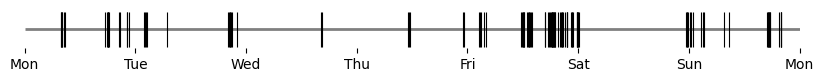

In [12]:
fig, ax = plt.subplots(figsize=(10, 0.5))

ax.hlines(1, pd.Timestamp('2024-01-01 00:00'), pd.Timestamp('2024-01-08 00:00'), color='gray', linewidth=2)

ax.vlines(Bob.sparse_traj['local_timestamp'], 0.95, 1.05, color='black', linewidth=0.8, alpha=1)

ax.set_xlim(pd.Timestamp('2024-01-01 00:00'), pd.Timestamp('2024-01-08 00:00'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))
plt.xticks(rotation=0)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.yaxis.set_visible(False)

fig.savefig("nhpp-sampling.png")

plt.show()

# Generating multiple agents

A population may contain any number of agents, which can be initialized en masse using the `Population.generate_agents` method. Each agent is assigned a randomly name as well as a uniformly sampled home and workplace. The `start_time` parameter indicates the time at which the agents start their trajectories.

Agent trajectories can be generated by looping over each agent and running the `Population.generate_trajectory` function as explained above. Note: if using a seed, make sure that each agent's seed is different to avoid all agents having the same trajectory.

In [13]:
population2 = Population(city)
population2.generate_agents(N = 5,
                            start_time = datetime(2024, 1, 1, hour=8, minute=0),
                            seed=100)

for i, agent_id in enumerate(population2.roster):
    agent = population2.roster[agent_id]
    population.generate_trajectory(agent, 
                                   T=datetime(2024, 1, 8, hour=0, minute=0),
                                   seed=100+i)
    agent.sample_traj_hier_nhpp(*hier_nhpp_params, seed=seed+i)
    
population2.roster

{'nifty_saha': <traj_gen.Agent at 0x12a84d090>,
 'nostalgic_wing': <traj_gen.Agent at 0x129ecb5c0>,
 'optimistic_brahmagupta': <traj_gen.Agent at 0x129ecaea0>,
 'peaceful_gates': <traj_gen.Agent at 0x129e71b50>,
 'pedantic_kowalevski': <traj_gen.Agent at 0x129ebf570>}

Any individual agent can be accessed by calling their id through the `Population.roster` dictionary. 

In [14]:
nifty_saha = population2.roster['nifty_saha']
print(nifty_saha.diary)
print(nifty_saha.trajectory)
print(nifty_saha.sparse_traj)

     unix_timestamp     local_timestamp  duration   location
0        1704114000 2024-01-01 08:00:00         1  h-x13-y11
1        1704114060 2024-01-01 13:01:00         5       None
2        1704114360 2024-01-01 13:06:00       235   w-x18-y8
3        1704128460 2024-01-01 17:01:00         2       None
4        1704128580 2024-01-01 17:03:00        28  r-x18-y10
..              ...                 ...       ...        ...
154      1704668580 2024-01-07 23:03:00        13   r-x9-y18
155      1704669360 2024-01-07 23:16:00         7       None
156      1704669780 2024-01-07 23:23:00        23    r-x3-y4
157      1704671160 2024-01-07 23:46:00         6       None
158      1704671520 2024-01-07 23:52:00       309  h-x12-y13

[159 rows x 4 columns]
              x          y     local_timestamp  unix_timestamp  identifier
0     14.500000  11.500000 2024-01-01 08:00:00      1704114000  nifty_saha
1     14.543250  10.602152 2024-01-01 13:01:00      1704114060  nifty_saha
2     15.876826  12

# Demonstration: Clustering Algorithms

To demonstrate one use case of our model, we explore how differing degrees of sparsity can affect the performance of stop detection algorithms like DBSCAN. We first initialize an agent (Charlie) and generate a complete trajectory. In what proceeds, we manually initialize Charlie's destination diary as consecutive 1-hour visits to two homes followed by a 3-hour visit at a larger retail building. A more extended simulation can (and should) leverage the exploration and preferential return generation model. For this toy example, however, we present an artificial example for simplicity.

In [15]:
start_time = [datetime(2024, 6, 1, hour=0, minute=0) + timedelta(minutes=60*t) for t in range(5)]
unix_timestamp = [int(t.timestamp()) for t in start_time]
duration = [60]*5  # in minutes

location = ['h-x13-y11'] * 1 + ['h-x13-y9'] * 1 + ['r-x18-y10'] * 3

destination = pd.DataFrame(
    {"unix_timestamp": unix_timestamp, "local_timestamp": start_time,
     "duration": duration, "location": location}
)
destination = tg.condense_destinations(destination)

Charlie = Agent("Charlie",
                'h-x13-y11',
                'w-x15-y9',
                city,
                destination_diary=destination,
                dt=1)

population.add_agent(Charlie)
population.generate_trajectory(Charlie, seed=75)

Charlie.diary

,unix_timestamp,local_timestamp,duration,location
0,1717200000,2024-06-01 00:00:00,61,h-x13-y11
1,1717203660,2024-06-01 01:01:00,2,None
2,1717203780,2024-06-01 01:03:00,58,h-x13-y9
3,1717207260,2024-06-01 02:01:00,4,None
4,1717207500,2024-06-01 02:05:00,176,r-x18-y10


Charlie's ground-truth trajectory is plotted below.

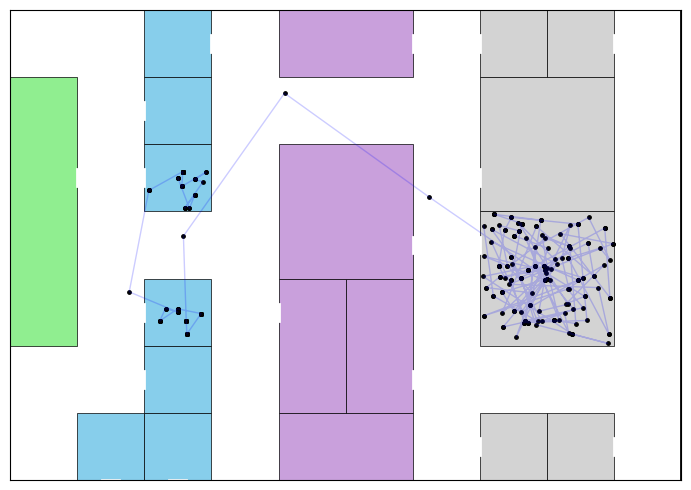

<Figure size 640x480 with 0 Axes>

In [16]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(Charlie.trajectory.x, Charlie.trajectory.y, s=6, color='black', alpha=1, zorder=2)
city.plot_city(ax, doors=True, address=False, zorder=1)

ax.plot(Charlie.trajectory.x, Charlie.trajectory.y, linewidth=1, color='blue', alpha=0.2)

ax.set_xlim(12, 22)
ax.set_ylim(7, 14)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

plt.savefig("garden-city-zoomed.png")

We sample Charlie's ground-truth trajectory at two levels of sparsity. 
* The higher sparsity sample uses parameters `beta_start`=120, `beta_dur`=30, and `beta_ping`=5. 
* The lower sparsity sample uses parameters `beta_start`=60, `beta_dur`=45, and `beta_ping`=2. 

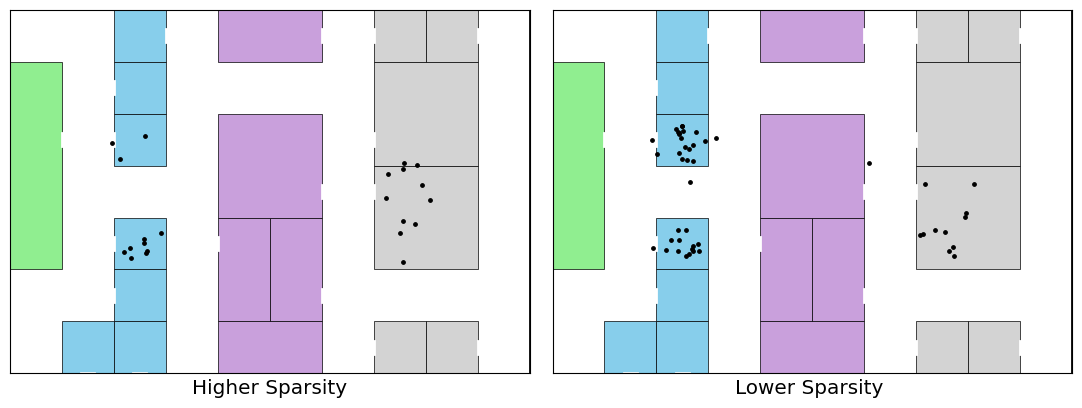

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
hier_nhpp_params = [(120, 30, 5), (60, 45, 2)]
seed = 375

for j in range(2):
    ax = axes[j]
    Charlie.sample_traj_hier_nhpp(*hier_nhpp_params[j], seed=seed)

    ax.scatter(Charlie.sparse_traj.x, Charlie.sparse_traj.y, s=6, color='black', alpha=1, zorder=2)
    city.plot_city(ax, doors=True, address=False, zorder=1)

    ax.set_xlim(12, 22)
    ax.set_ylim(7, 14)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

axes[0].set_xlabel('Higher Sparsity', fontsize='x-large')
axes[1].set_xlabel('Lower Sparsity ', fontsize='x-large')

plt.tight_layout()
plt.savefig("garden-city-sparse.png")
plt.show()

We are interested in how the sparsity of the trajectory and parameterization of stop detection algorithms interact. Here, we use a temporal version of DBSCAN to cluster pings into stops. DBSCAN takes three parameters: `time_thresh`, `dist_thresh`, and `min_pts`. Roughly, a point is considered part of a dense cluster if it has at least `min_pts` neighboring points within a distance `dist_thresh` and time gap `time_thresh`; otherwise, it is labeled as noise. 

We explore a fine and a coarse parameterization of DBSCAN and apply each to the higher and lower sparsity trajectories.

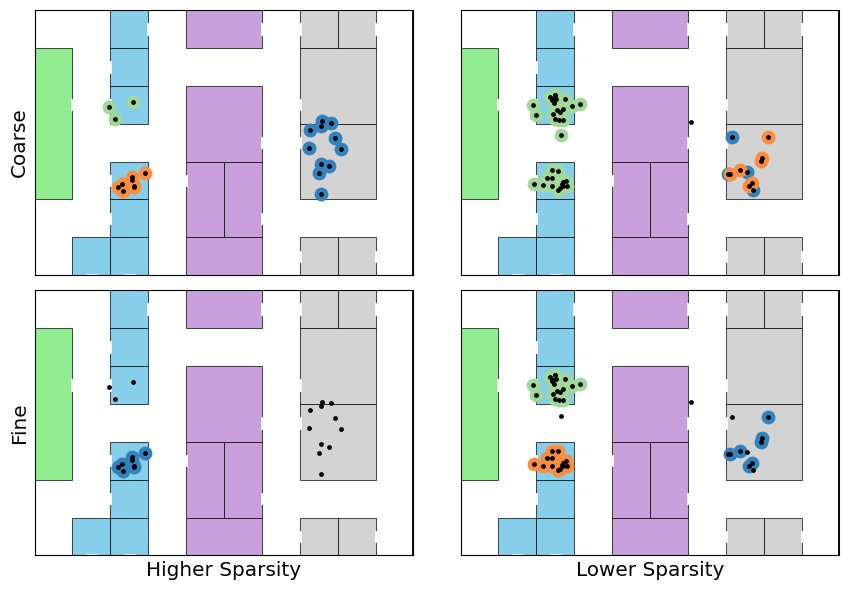

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
dbscan_params = [(150, 1.5, 2), (60, 0.75, 4)]

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        Charlie.sample_traj_hier_nhpp(*hier_nhpp_params[j], seed=seed)

        dbscan_out = sd.temporal_dbscan(Charlie.sparse_traj, *dbscan_params[i])

        num_clusters = sum(dbscan_out.cluster.unique() > -1)
        for cid in range(num_clusters):
            cpings = dbscan_out[dbscan_out.cluster == cid]
            cdata = Charlie.sparse_traj.loc[cpings.index]
            col = cm.tab20c(cid/(num_clusters+1))
            ax.scatter(cdata.x, cdata.y, s=80, color=col, alpha=1, zorder=2)

        ax.scatter(Charlie.sparse_traj.x, Charlie.sparse_traj.y, s=6, color='black', alpha=1, zorder=2)
        city.plot_city(ax, doors=True, address=False, zorder=1)

        ax.set_xlim(12, 22)
        ax.set_ylim(7, 14)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])

axes[0, 0].set_ylabel('Coarse', fontsize='x-large')
axes[1, 0].set_ylabel('Fine', fontsize='x-large')
axes[1, 0].set_xlabel('Higher Sparsity', fontsize='x-large')
axes[1, 1].set_xlabel('Lower Sparsity', fontsize='x-large')

plt.tight_layout()
plt.savefig("garden-city-stdbscan.png")
plt.show()